### Pandas

In [12]:
import os 
import pandas as pd

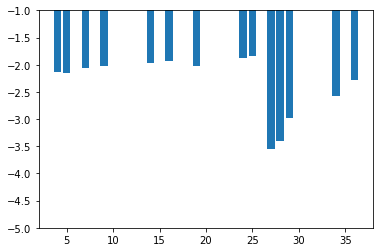

In [13]:
import os 
import pandas as pd 
import matplotlib.pyplot as plt 


def find_everything(file):
    idx_1 = file.find('_')
    idx_2 = file.find('_', idx_1+1)
    shape = file[idx_1+1:idx_2].capitalize()

    mgcl_idx_1 = file.find('2)')
    mgcl_idx_2 = file.find('_(', mgcl_idx_1)
    mgcl2 = file[mgcl_idx_1+2 : mgcl_idx_2]

    alcl_idx_1 = file.find('3)')
    alcl_idx_2 = file.find('.log', alcl_idx_1 )
    alcl3 = file[alcl_idx_1+2 : alcl_idx_2]

    return shape, int(mgcl2), int(alcl3)


folder_path = "C:/Users/zorve/OneDrive/Desktop/github_upload/3.__NumPy_Pandas_Matplotlib/data"
file_path =   "C:/Users/zorve/OneDrive/Desktop/github_upload/3.__NumPy_Pandas_Matplotlib/data/"

gibbs_energy, gibbs_shapes, gibbs_mgcl2, gibbs_alcl3   = [], [], [], []

for file in os.listdir(folder_path):
    files = file_path + file
    with open(files, 'r') as f: 
        lines = f.readlines()

        shape, mgcl2, alcl3 = find_everything(file)
        gibbs_shapes.append(shape), gibbs_mgcl2.append(mgcl2), gibbs_alcl3.append(alcl3)

        for line in lines:
            if line.startswith(' Sum of electronic and thermal Free Energies='):
                gibbs = float(line[45:].strip())

                gibbs_energy.append(round(gibbs * 0.001, 1))

data = pd.DataFrame({'shape' : gibbs_shapes, 'mgcl2' : gibbs_mgcl2, 'alcl3' : gibbs_alcl3, 'kjmol-1' : gibbs_energy})




data = data.sort_values(by='mgcl2')

data.to_csv('gibbs_.csv')

data['per MgCl2'] = round(data['kjmol-1'] / data['mgcl2'], 1)
data['per AlCl3'] = round(data['kjmol-1'] / data['alcl3'], 1)

plt.bar(gibbs_mgcl2, data['kjmol-1'] / data['mgcl2'] )
plt.ylim(bottom=-5, top=-1)
plt.show()

In [14]:
folder_path = 'C:/Users/zorve/OneDrive/Desktop/github_upload/3.__NumPy_Pandas_Matplotlib/data'

file_name, extracted_number = [], []

for file in os.listdir(folder_path):
    path = f'{folder_path}/' + file 

    with open(path, 'r') as f:
        lines = f.readlines()
    
    for line in lines:
        if line.startswith(' Sum of electronic and thermal Free Energies='):
            number = float(line[47:].strip())
            file_name.append(file), extracted_number.append(number)


df = pd.DataFrame({'file_name' : file_name, 'gibbs_energy' : extracted_number})
df['kJmol-1'] = round(df['gibbs_energy'] * 0.001, 2)

df.to_csv('gibbs.csv')


my_list = [ '10_pyramid_(MgCl2)27_(AlCl3)14.log',  
            '11_slab_(MgCl2)28_(AlCl3)14.log',
            '12_pipe_(MgCl2)29_(AlCl3)16.log',
            '13_diamond_(MgCl2)34_(AlCl3)16.log',
            '14_quadrangle_(MgCl2)36_(AlCl3)16.log',
            '1_quadrangle_(MgCl2)4_(AlCl3)6.log',
            '2_pyramid_(MgCl2)5_(AlCl3)7.log',
            '3_diamond_(MgCl2)7_(AlCl3)8.log',
            '4_pipe_(MgCl2)9_(AlCl3)8.log',
            '5_diamond_(MgCl2)14_(AlCl3)10.log',
            '6_quadrangle_(MgCl2)16_(AlCl3)10.log',
            '7_pipe_(MgCl2)19_(AlCl3)12.log',
            '8_pipe_(MgCl2)24_(AlCl3)14.log',
            '9_quaqdrangle_(MgCl2)25_(AlCl3)14.log']

for item in my_list:
    shape_idx_1 = item.find('_')
    shape_idx_2 = item.find('_', shape_idx_1+1)
    shape = item[shape_idx_1+1:shape_idx_2]

    # print(shape)

for item in my_list:
    mgcl2_idx_1 = item.find('2)')
    mgcl2_idx_2 = item.find('_(', mgcl2_idx_1+1)
    mgcl2 = item[mgcl2_idx_1+2:mgcl2_idx_2]
    # print(mgcl2)


for item in my_list:
    alcl3_idx_1 = item.find('3)')
    alcl3_idx_2 = item.find('.log', alcl3_idx_1+1)
    alcl3 = item[alcl3_idx_1+2:alcl3_idx_2]
    # print(alcl3)

In [15]:
data = pd.read_csv('gibbs.csv')
data 

,Unnamed: 0,file_name,gibbs_energy,kJmol-1
0,0,10_pyramid_(MgCl2)27_(AlCl3)14.log,-52983.573858,-52.98
1,1,11_slab_(MgCl2)28_(AlCl3)14.log,-54104.302421,-54.10
2,2,12_pipe_(MgCl2)29_(AlCl3)16.log,-58471.428956,-58.47
3,3,13_diamond_(MgCl2)34_(AlCl3)16.log,-64074.819104,-64.07
4,4,14_quadrangle_(MgCl2)36_(AlCl3)16.log,-66316.189588,-66.32
5,5,1_quadrangle_(MgCl2)4_(AlCl3)6.log,-14222.154238,-14.22
6,6,2_pyramid_(MgCl2)5_(AlCl3)7.log,-16966.034549,-16.97
7,7,3_diamond_(MgCl2)7_(AlCl3)8.log,-20830.672990,-20.83
8,8,4_pipe_(MgCl2)9_(AlCl3)8.log,-23072.035636,-23.07
9,9,5_diamond_(MgCl2)14_(AlCl3)10.log,-31921.879449,-31.92


In [16]:
data = pd.read_csv('gibbs_.csv')
data 

,Unnamed: 0,shape,mgcl2,alcl3,kjmol-1
0,5,Quadrangle,4,6,-14.2
1,6,Pyramid,5,7,-17.0
2,7,Diamond,7,8,-20.8
3,8,Pipe,9,8,-23.1
4,9,Diamond,14,10,-31.9
5,10,Quadrangle,16,10,-34.2
6,11,Pipe,19,12,-40.8
7,12,Pipe,24,14,-49.6
8,13,Quaqdrangle,25,14,-50.7
9,0,Pyramid,27,14,-53.0
